/usr/local/lib/python3.10/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


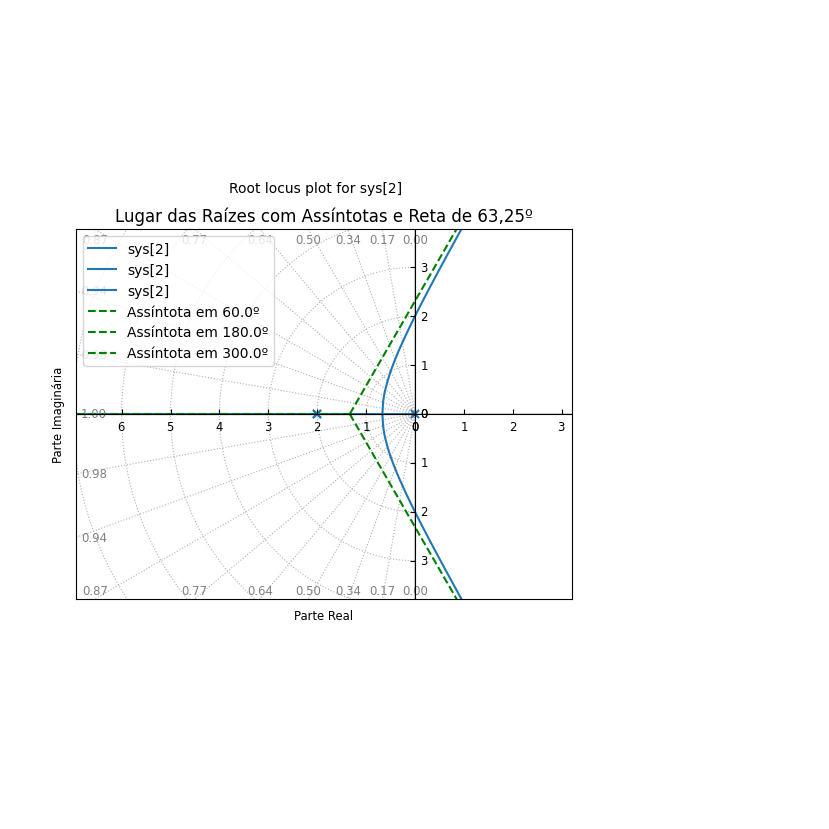

Centroide das assíntotas: -1.33+0.00j


In [3]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
from control import tf, root_locus

# Definindo a função de transferência do sistema
numerador = [1]
denominador = [1, 4,4 ,0 ]
sistema = tf(numerador, denominador)

# Ângulo da reta auxiliar para sobressinal de 20%
theta = np.deg2rad(63.25)  # Ângulo de 63,25º em radianos

# Cálculo dos pólos e zeros
poles = sistema.poles()
zeros = sistema.zeros()

# Número de pólos e zeros
n_polos = len(poles)
n_zeros = len(zeros)

# Cálculo do centroide e ângulos das assíntotas
centroide = (np.sum(poles) - np.sum(zeros)) / (n_polos - n_zeros)
angulos_assintotas = [np.deg2rad(180 * (2 * k + 1) / (n_polos - n_zeros)) for k in range(n_polos - n_zeros)]

# Plot do Lugar das Raízes com as assíntotas e reta auxiliar
plt.figure()
rlocus_data = root_locus(sistema, grid=True, plot=True)

# Adiciona a reta de 63,25º ao gráfico
max_real = np.max(np.real(rlocus_data[0]))  # Valor real máximo do LGR


# Plot das assíntotas
for angle in angulos_assintotas:
    plt.plot(
        [np.real(centroide), np.real(centroide) + max_real * np.cos(angle)],
        [np.imag(centroide), np.imag(centroide) + max_real * np.sin(angle)],
        'g--', label=f"Assíntota em {np.rad2deg(angle):.1f}º"
    )

plt.title("Lugar das Raízes com Assíntotas e Reta de 63,25º")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.legend()
plt.show()

# Exibe o centroide das assíntotas
print(f"Centroide das assíntotas: {centroide:.2f}")

Overshoot: 0.00%
Erro de estado estacionário: 0.9575


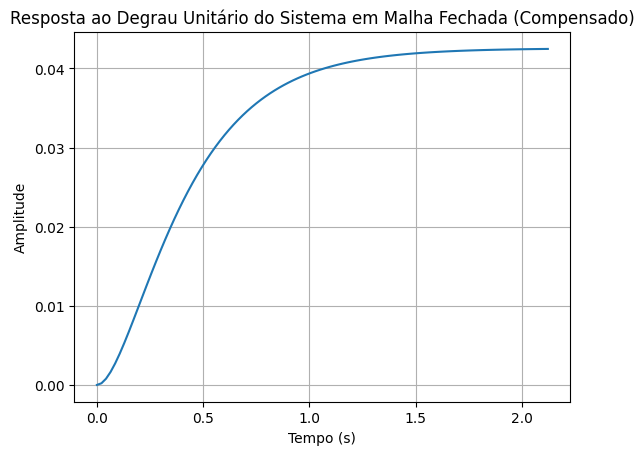

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, series, feedback, step_response

# Definindo a função de transferência do sistema não compensado
numerador_sistema = numerador = [1, 8]
denominador_sistema = [1, 19, 108, 180]
sistema_nao_compensado = tf(numerador_sistema, denominador_sistema)

# Colocando o sistema em malha fechada (feedback unitário)
sistema_malha_fechada = feedback(sistema_nao_compensado, 1)

# Gerando a resposta ao degrau com tempo de análise de 30 segundos
t = np.linspace(0, 30, 1000)  # 1000 pontos entre 0 e 30 segundos
t, y = step_response(sistema_malha_fechada, T=t)

# Gerando a resposta ao degrau
t, y = step_response(sistema_malha_fechada)

# Cálculo do overshoot (em %)
y_final = y[-1]
overshoot = (np.max(y) - y_final) / y_final * 100

# Cálculo do erro de estado estacionário
erro_ess = abs(1 - y_final)

# Exibindo os resultados
print(f"Overshoot: {overshoot:.2f}%")
print(f"Erro de estado estacionário: {erro_ess:.4f}")

# Plotando a resposta ao degrau
plt.figure()
plt.plot(t, y)
plt.title("Resposta ao Degrau Unitário do Sistema em Malha Fechada (Compensado)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


Ponto de amortecimento desejado: (-5.399318374617607-9.620781900542969j)
Ganho associado: 102.27562588183423


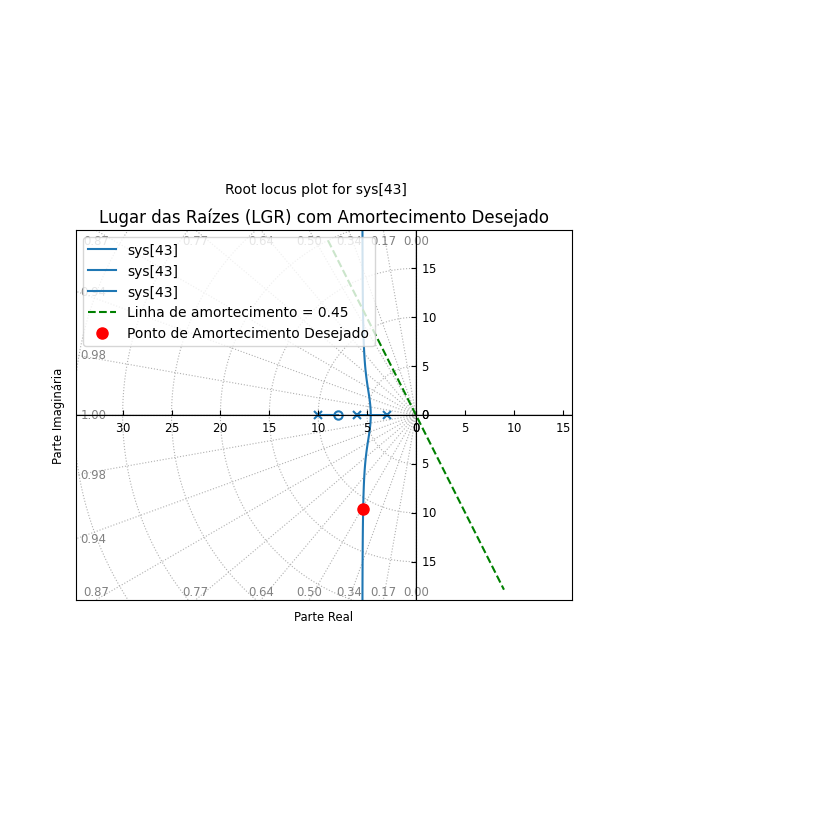

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, rlocus, poles, damp

# Definindo o sistema não compensado
numerador_sistema = [1, 8]
denominador_sistema = [1, 19, 108, 180]
sistema_nao_compensado = tf(numerador_sistema, denominador_sistema)

# Fator de amortecimento desejado
amortecimento_desejado = 0.45
angulo_amortecimento = np.arccos(amortecimento_desejado)  # Ângulo em radianos

# Calculando o Lugar das Raízes (LGR) e os valores de ganho correspondentes
pontos_lgr, ganhos = rlocus(sistema_nao_compensado, plot=False)

# Encontrando o ponto que atende ao amortecimento desejado
ponto_amortecimento = None
for idx, polos in enumerate(pontos_lgr):
    for polo in polos:
        # Calcula o amortecimento atual de cada polo
        amortecimento_atual = -np.cos(np.angle(polo)) if polo.real < 0 else 0
        if np.isclose(amortecimento_atual, amortecimento_desejado, atol=0.05):  # Tolerância de 0.05
            ponto_amortecimento = polo
            ganho_amortecimento = ganhos[idx]
            break
    if ponto_amortecimento:
        break

# Plotando o Lugar das Raízes (LGR) com a linha de amortecimento
plt.figure()
rlocus(sistema_nao_compensado)
plt.title("Lugar das Raízes (LGR) com Amortecimento Desejado")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.grid(True)

# Desenhando a linha de amortecimento desejado
limite = 20  # Limite para extensão da linha
plt.plot(
    [-limite * np.cos(angulo_amortecimento), limite * np.cos(angulo_amortecimento)],
    [limite * np.sin(angulo_amortecimento), -limite * np.sin(angulo_amortecimento)],
    'g--', label=f"Linha de amortecimento = {amortecimento_desejado}"
)

# Marcando o ponto de amortecimento no gráfico, se encontrado
if ponto_amortecimento:
    plt.plot(ponto_amortecimento.real, ponto_amortecimento.imag, 'ro', markersize=8, label="Ponto de Amortecimento Desejado")
    print(f"Ponto de amortecimento desejado: {ponto_amortecimento}")
    print(f"Ganho associado: {ganho_amortecimento}")
else:
    print("Não foi encontrado um ponto no LGR com o amortecimento desejado.")

plt.legend()
plt.show()

